In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import json
import scipy
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
spl=pd.read_csv("D:/project/.venv/Internship/car_pirce_prediction/car_data.csv")
spl.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory data Analysis

In [3]:
spl.shape

(301, 9)

In [4]:
spl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
spl.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
spl.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
spl.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

C:\Users\halee\AppData\Local\Temp\ipykernel_12100\446475625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spl[i])


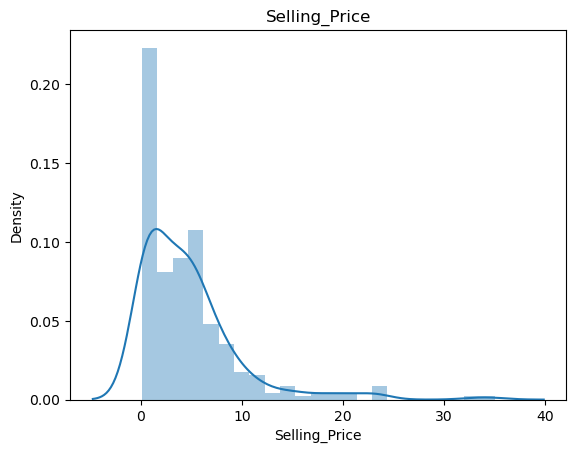

C:\Users\halee\AppData\Local\Temp\ipykernel_12100\446475625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spl[i])


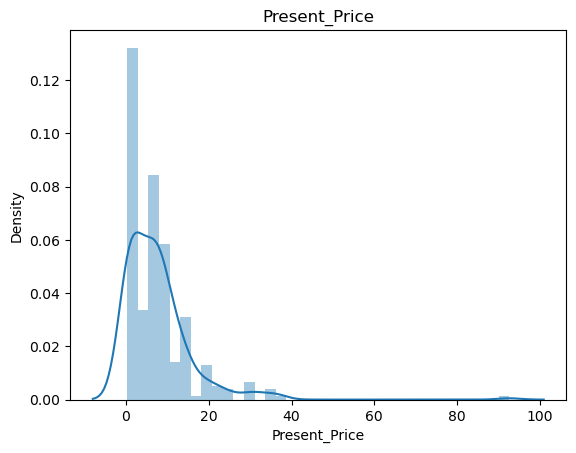

C:\Users\halee\AppData\Local\Temp\ipykernel_12100\446475625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spl[i])


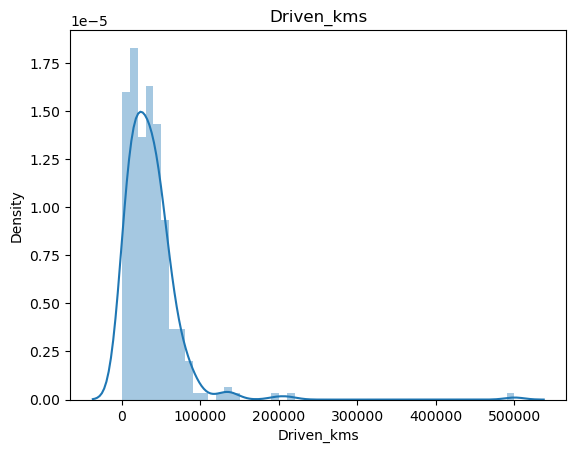

C:\Users\halee\AppData\Local\Temp\ipykernel_12100\446475625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spl[i])


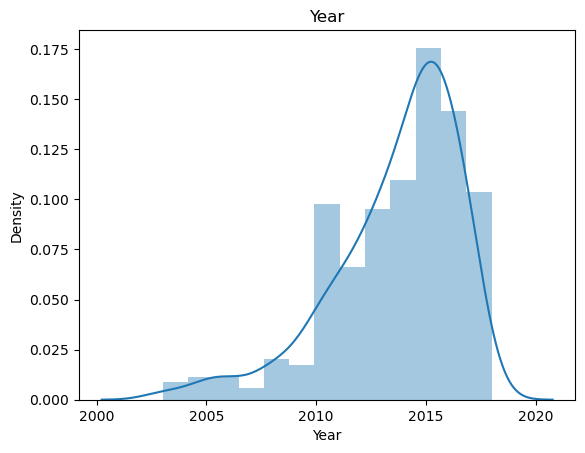

In [8]:
a=['Selling_Price','Present_Price','Driven_kms','Year']
for i in a:
    sns.distplot(spl[i])
    plt.title(i)
    plt.show()

In [9]:
spl.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
spl['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [11]:
spl['Driven_kms'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [58]:
spl['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [59]:
spl['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [68]:
spl['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [38]:
spl['Fuel_Type'].nunique()

3

In [14]:
spl['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
spl['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [12]:
spl['Driven_kms'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

# finding skewness value

In [15]:
b=['Selling_Price','Present_Price','Driven_kms','Year']
for i in b:
    sk_value_1=scipy.stats.skew(spl[i], axis=0, bias=True)
    print(sk_value_1)

2.480979484005291
4.065021455029187
6.403895025283172
-1.2399702494847509


# log transform

In [16]:
spl['Selling_Price']= np.log(spl['Selling_Price'])
spl['Present_Price']= np.log(spl['Present_Price'])
#spl['Driven_kms']= np.log(spl['Driven_kms'])


In [17]:
for i in b:
    sk_value_2=scipy.stats.skew(spl[i], axis=0, bias=True)
    print(sk_value_2)

-0.47195224980427514
-0.36978461052603007
6.403895025283172
-1.2399702494847509


# Outliner dectection

In [18]:
def outlier(spl,column):
  q1= spl[column].quantile(0.25)
  q3= spl[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  return upper_threshold,lower_threshold

In [19]:
column=['Selling_Price','Present_Price','Driven_kms','Year']
for i in column:
    print(outlier(spl,i))

(4.637439446556877, -2.9510404929866483)
(5.457854557660429, -2.9829982437259304)
(99417.5, -35650.5)
(2022.0, 2006.0)


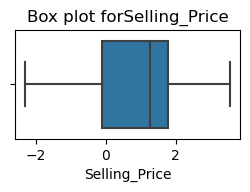

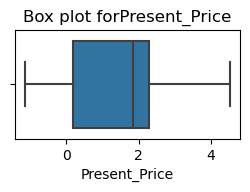

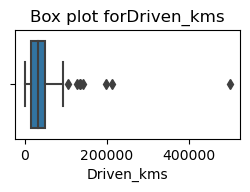

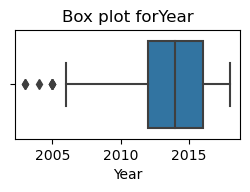

In [20]:
for i in column:
    plt.subplot(3,2,4)
    sns.boxplot(x=spl[i])
    plt.title("Box plot for" + i)
    plt.show()

In [19]:
spl.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: >

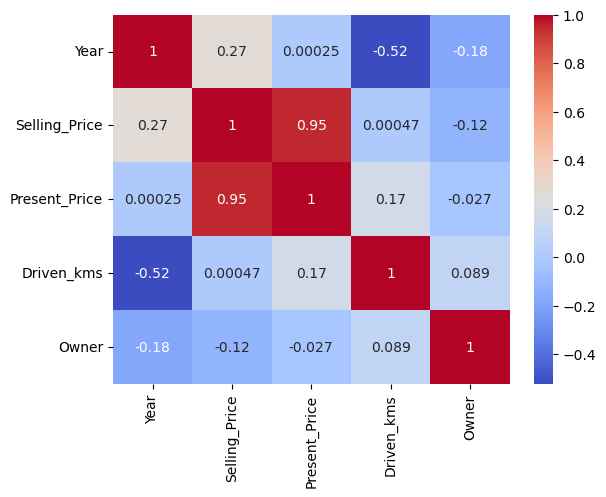

In [21]:
x=spl[['Year','Selling_Price','Present_Price','Driven_kms','Owner']].corr()
sns.heatmap(x, annot=True, cmap="coolwarm")

# Data Encoding 

In [23]:
cat_column=['Car_Name','Fuel_Type','Transmission','Owner','Selling_type']
unique_dist={}
for i in cat_column:
    unique_dist[f'{i}_initial']=spl[i].unique().tolist()

    le=LabelEncoder()
    spl[i]=le.fit_transform(spl[i])
    unique_dist[f'{i}_Final']=spl[i].unique().tolist()
unique_dist

{'Car_Name_initial': ['ritz',
  'sx4',
  'ciaz',
  'wagon r',
  'swift',
  'vitara brezza',
  's cross',
  'alto 800',
  'ertiga',
  'dzire',
  'alto k10',
  'ignis',
  '800',
  'baleno',
  'omni',
  'fortuner',
  'innova',
  'corolla altis',
  'etios cross',
  'etios g',
  'etios liva',
  'corolla',
  'etios gd',
  'camry',
  'land cruiser',
  'Royal Enfield Thunder 500',
  'UM Renegade Mojave',
  'KTM RC200',
  'Bajaj Dominar 400',
  'Royal Enfield Classic 350',
  'KTM RC390',
  'Hyosung GT250R',
  'Royal Enfield Thunder 350',
  'KTM 390 Duke ',
  'Mahindra Mojo XT300',
  'Bajaj Pulsar RS200',
  'Royal Enfield Bullet 350',
  'Royal Enfield Classic 500',
  'Bajaj Avenger 220',
  'Bajaj Avenger 150',
  'Honda CB Hornet 160R',
  'Yamaha FZ S V 2.0',
  'Yamaha FZ 16',
  'TVS Apache RTR 160',
  'Bajaj Pulsar 150',
  'Honda CBR 150',
  'Hero Extreme',
  'Bajaj Avenger 220 dtsi',
  'Bajaj Avenger 150 street',
  'Yamaha FZ  v 2.0',
  'Bajaj Pulsar  NS 200',
  'Bajaj Pulsar 220 F',
  'TVS Apa

In [22]:
with open('Cat_Columns_Encoded.json', 'w') as file:
    json.dump(unique_dist, file , indent = 4)

In [24]:
spl.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,1.208960,1.720979,27000,2,0,1,0
1,93,2013,1.558145,2.255493,43000,1,0,1,0
2,68,2017,1.981001,2.287471,6900,2,0,1,0
3,96,2011,1.047319,1.423108,5200,2,0,1,0
4,92,2014,1.526056,1.927164,42450,1,0,1,0


# split the sample into feature and targets

In [25]:
x=spl[['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]
y=spl[['Selling_Price']]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

#  Model test

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(x_train , y_train)
y_pred = linear_reg.predict(x_test)
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2 Score = {linear_reg.score(x_test,y_test)}')

MAE = 0.1570994152822863
MSE = 0.0398328847993389
R2 Score = 0.9751304388403904


In [28]:
decision_reg = DecisionTreeRegressor()
decision_reg.fit(x_train , y_train)
y_pred = decision_reg.predict(x_test)
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2 Score = {decision_reg.score(x_test,y_test)}')

MAE = 0.22728822129561713
MSE = 0.13053094196351753
R2 Score = 0.9185033356048311


In [30]:
random_reg = RandomForestRegressor()
random_reg.fit(x_train , y_train)
y_pred = random_reg.predict(x_test)
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2 Score = {decision_reg.score(x_test,y_test)}')

MAE = 0.17660584940824778
MSE = 0.07987322345814646
R2 Score = 0.9185033356048311


c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Based three different model of regression Linear regression Have acuuracy of 97.60% accuracy with Less MSE and MAE Pickel The model for Future Use.

In [31]:
with open ('car_sell.pkl', 'wb') as f:
    pickle.dump(linear_reg , f)

In [78]:
with open("D:/project/.venv/Internship/car_pirce_prediction/Cat_Columns_Encoded.json",'rb') as file:
    encode_file = json.load(file)

In [84]:
car_name="jazz"
car_encode = encode_file['Car_Name_Final'][(encode_file["Car_Name_initial"].index(car_name))]
car_encode

87